In [0]:
!pip install fastai2
!pip install nbdev
!pip install azure-cognitiveservices-search-imagesearch
!pip install voila
!jupyter serverextension enable voila --sys-prefix

In [0]:
from utils import *
from fastai2.vision.all import *
from fastai2.vision.widgets import *

In [0]:
key = '2ca959c66ac7423aa2c9a456f207d062'

In [4]:
results = search_images_bing(key, 'basketball shoes')
ims  = results.attrgot('content_url')
len(ims)

150

In [0]:
diff_shoes = ['basketball shoes', 'football boots', 'home slippers']

In [0]:
path = Path('shoes')

In [0]:
if not path.exists():
  path.mkdir()
  for item in diff_shoes:
    dest = (path/item)
    dest.mkdir(exist_ok= True)
    results= search_images_bing(key, item)
    download_images(dest,urls=results.attrgot('content_url'))

In [8]:
get_image_files(path)

(#424) [Path('shoes/home slippers/00000134.jpg'),Path('shoes/home slippers/00000075.jpg'),Path('shoes/home slippers/00000065.jpg'),Path('shoes/home slippers/00000036.jpg'),Path('shoes/home slippers/00000038.jpg'),Path('shoes/home slippers/00000116.jpg'),Path('shoes/home slippers/00000111.jpg'),Path('shoes/home slippers/00000096.jpg'),Path('shoes/home slippers/00000007.jpg'),Path('shoes/home slippers/00000043.jpg')...]

In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [0]:
shoes = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(vilid_pct = 0.3, seed =42),
    get_y = parent_label,
    item_tfms= Resize(128)
)

In [0]:
dls = shoes.dataloaders(path)

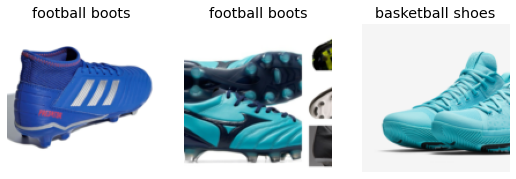

In [12]:
dls.train.show_batch(max_n =3, nrows =1)

In [0]:
shoes = shoes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = shoes.dataloaders(path)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.421057,0.830334,0.404762,00:11


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.590054,0.344466,0.119048,00:11
1,0.438747,0.278445,0.095238,00:12
2,0.353348,0.227596,0.083333,00:11
3,0.290220,0.235268,0.083333,00:12


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


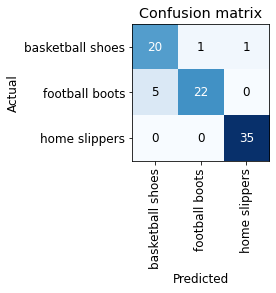

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

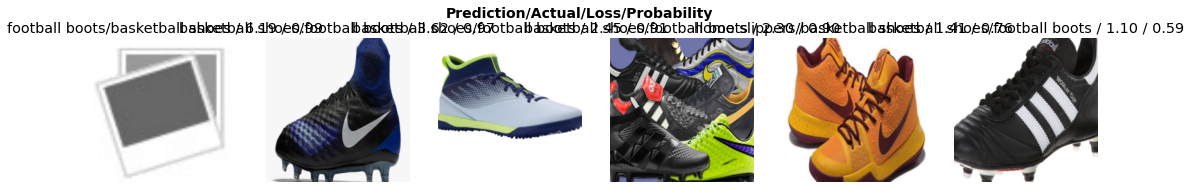

In [16]:
interp.plot_top_losses(6, nrows=1)

In [17]:
image = PILImage.create('jordan.jpg')
learn.predict(image)

('basketball shoes', tensor(0), tensor([9.9582e-01, 4.1224e-03, 5.7884e-05]))

In [0]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [0]:
learn_inf = load_learner(path/'export.pkl')

In [0]:
out_pl = widgets.Output()

In [22]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [23]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [0]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [0]:
lbl_pred = widgets.Label()

In [28]:
VBox([widgets.Label('Select your shoes!'), 
      btn_upload, btn_run, out_pl, lbl_pred])